In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

生成具有两个相同度序列的简单网络

In [5]:
G=nx.Graph()
G.add_nodes_from([1,2,3,4,5])
G.add_edges_from([(1,2),(2,3),(1,3),(4,5)])
G2=nx.Graph()
G2.add_nodes_from([1,2,3,4,5])
G2.add_edges_from([(1,2),(1,3),(2,4),(3,5)])

画出对应的网络分布图和度分布
定义绘图函数plt_graph

In [6]:
def plt_graph(Graph,axis=None):
    pos=nx.circular_layout(Graph)
    nx.draw_networkx_nodes(Graph,pos=pos,node_size=500,node_color='r',alpha=0.6,ax=axis)
    nx.draw_networkx_edges(Graph,pos=pos,width=1.0,alpha=0.6,ax=axis)
    nx.draw_networkx_labels(Graph,pos=pos,font_size=16,ax=axis)

画出两个网络，并输出对应的平均度

G的平均度为： 1.6
G2的平均度为： 1.6


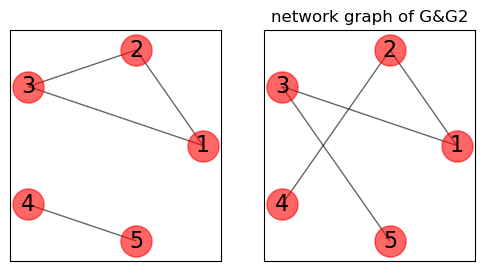

In [7]:
fig,ax=plt.subplots(1,2,figsize=(6,3))
plt_graph(G,axis=ax[0])
print("G的平均度为：",2*G.number_of_edges()/G.number_of_nodes())
plt_graph(G2,axis=ax[1])
print("G2的平均度为：",2*G2.number_of_edges()/G2.number_of_nodes())
plt.title("network graph of G&G2")
plt.show()

定义画出度分布直方图的函数

In [8]:
def draw_degree(Graph,axis=None):
    Matrix=dict(nx.degree(Graph))
    x=list(range(max(Matrix.values())+1))
    y=[i/len(G.nodes()) for i in nx.degree_histogram(G)]
    axis.set_xlabel("degree")
    axis.set_ylabel("P(k)")
    axis.bar(x,y)
    

依次画出G和G2的度分布直方图

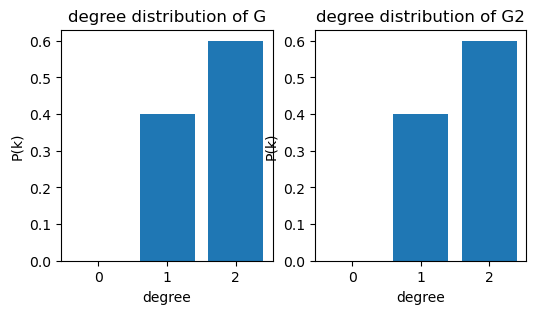

In [9]:
fig,ax=plt.subplots(1,2,figsize=(6,3))
ax[0].set_title("degree distribution of G")
ax[1].set_title("degree distribution of G2")
draw_degree(G,ax[0])
draw_degree(G2,ax[1])

生成一个中性网络，根据网络的二阶度分布，中性网络代表节点之间存在边的概率与两个节点的度无关

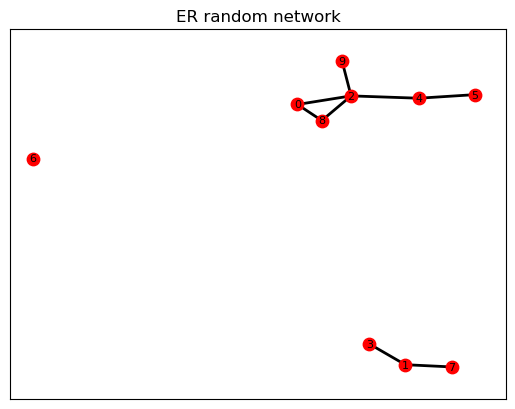

{0: 3.0, 1: 1.0, 2: 1.75, 3: 2.0, 4: 2.5, 5: 2.0, 6: 0.0, 7: 2.0, 8: 3.0, 9: 4.0}


In [10]:
# use networkx to generate ER random network
ER=nx.erdos_renyi_graph(10,0.2)
pos=nx.spring_layout(ER)
nx.draw_networkx_nodes(ER,pos=pos,node_size=80,node_color='r',alpha=1.0)
nx.draw_networkx_labels(ER,pos=pos,font_size=8)
nx.draw_networkx_edges(ER,pos=pos,width=2.0,alpha=1.0)
plt.title("ER random network")
plt.show()
print(nx.average_neighbor_degree(ER))

加载几个真实网络数据集，比较$<k_{nn}>$和k的关系，判断是否呈现度相关性

In [4]:
# 加载三个真实数据集
# 1. 科学合作网络
df1 = pd.read_excel("./real-data/citation.xlsx")
G1 = nx.from_pandas_edgelist(df1, 'source', 'target', create_using = nx.Graph())
# 2. 电网
df2 = pd.read_excel("./real-data/power.xlsx")
G2 = nx.from_pandas_edgelist(df2, 'source', 'target', create_using = nx.Graph())
# 3. 代谢网络
df3 = pd.read_excel("./real-data/celegans_metabolic.xlsx")
G3 = nx.from_pandas_edgelist(df3, 'source', 'target', create_using = nx.Graph())

In [6]:
print(G1.number_of_nodes(),G1.number_of_edges())
print(G2.number_of_nodes(),G2.number_of_edges())
print(G3.number_of_nodes(),G3.number_of_edges())

23133 93497
4941 6594
453 2040


计算$<k_{nn}>$并画图表示

In [12]:
def cal_knn(G):
    k=set([G.degree(i) for i in G.nodes()])
    sorted_k=sorted(k)
    iknn=nx.average_neighbor_degree(G)
    knn=[]
    for ki in sorted_k:
        #将每个度的平均邻居度放入列表，求平均值
        knn.append(np.mean([iknn[i] for i in G.nodes() if G.degree(i)==ki]))
        
    return sorted_k,knn

Citation:  0.13506886900042128
Power:  0.0034569877442048313
Celegans:  -0.219662309363656


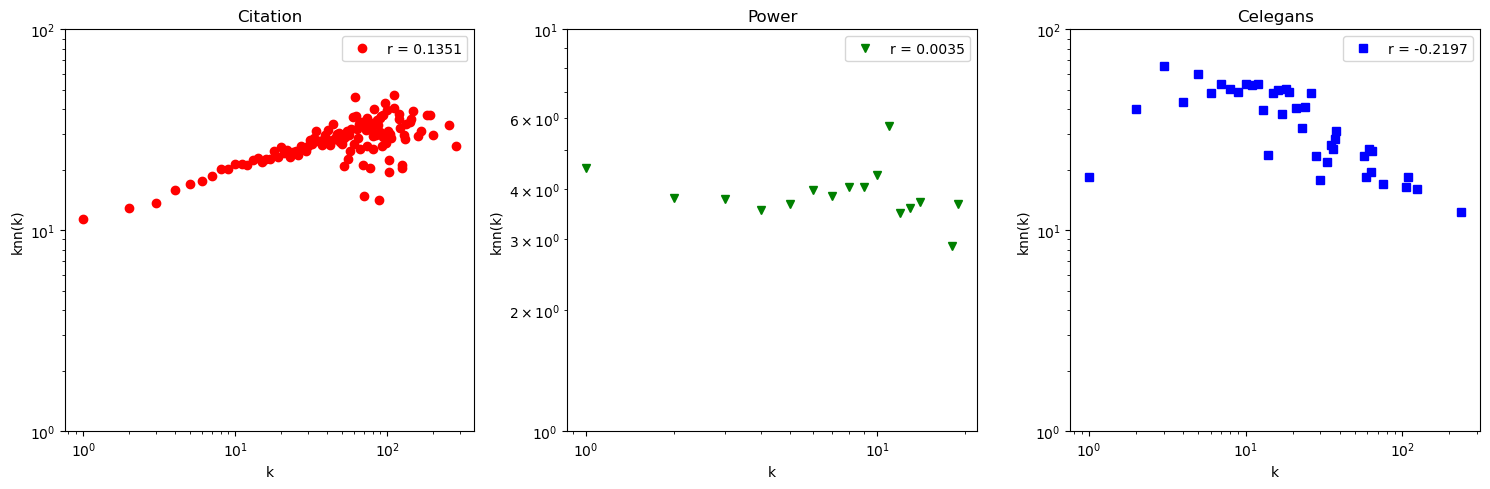

In [13]:
x1,y1=cal_knn(G1)
x2,y2=cal_knn(G2)
x3,y3=cal_knn(G3)
r1 = nx.degree_pearson_correlation_coefficient(G1)
r2 = nx.degree_pearson_correlation_coefficient(G2)
r3 = nx.degree_pearson_correlation_coefficient(G3)
print('Citation: ',r1)
print('Power: ',r2)
print('Celegans: ',r3)
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.plot(x1, y1,'ro',label='r = '+'%.4f'%r1)
plt.legend(loc=0)
plt.xlabel('k')
plt.ylabel('knn(k)')
plt.xscale('log')
plt.yscale('log')
plt.title('Citation')
plt.ylim(1, 100)

plt.subplot(132)
plt.plot(x2, y2,'gv',label='r = '+'%.4f'%r2)
plt.legend(loc=0)
plt.xlabel('k')
plt.ylabel('knn(k)')
plt.xscale('log')
plt.yscale('log')
plt.title('Power')
plt.ylim(1, 10)

plt.subplot(133)
plt.plot(x3, y3,'bs',label='r = '+'%.4f'%r3)
plt.legend(loc=0)
plt.xlabel('k')
plt.ylabel('knn(k)')
plt.xscale('log')
plt.yscale('log')
plt.title('Celegans')
plt.ylim(1, 100)
plt.tight_layout()

对生成的ER随机图，WS小世界网络和BA无标度网络，画出对应的二阶度分布曲线

ER:  -0.0031030426113469872
WS:  -0.02761951272451028
BA:  -0.02917562280173696
NW:  0.06589227075489984


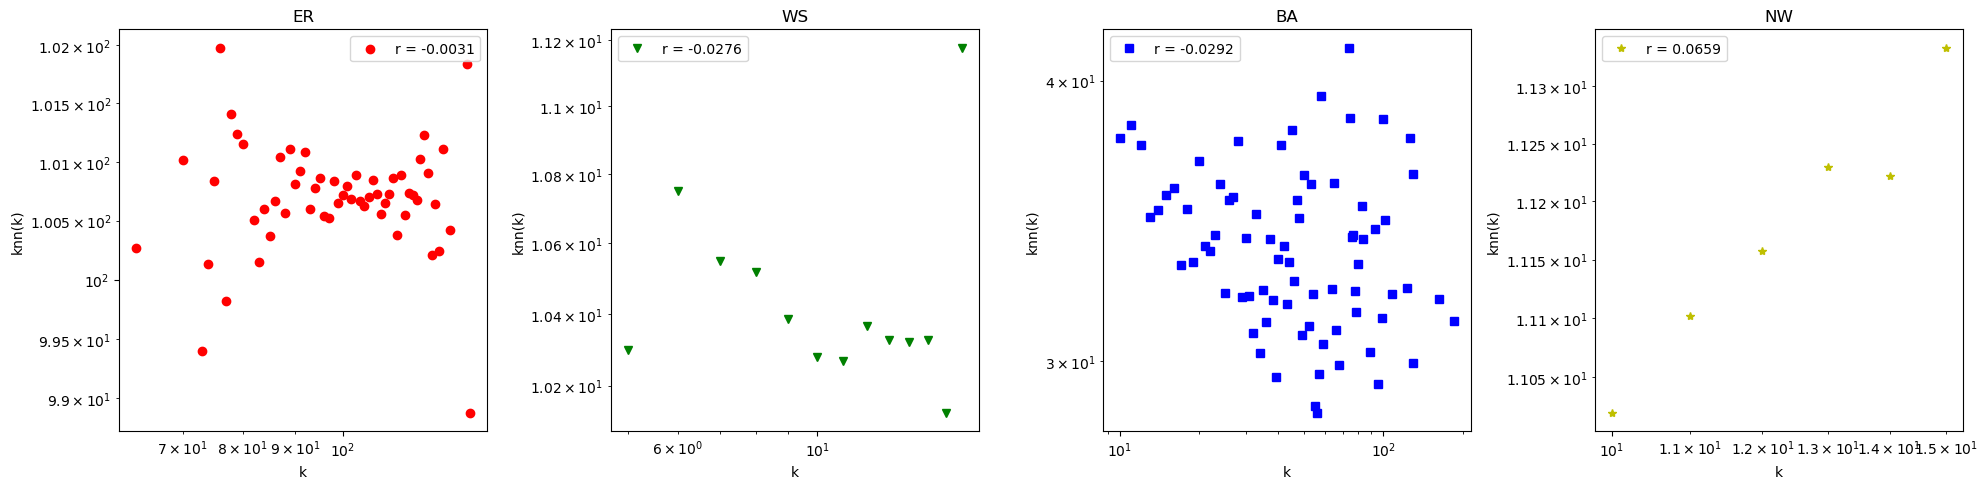

In [14]:
ER=nx.erdos_renyi_graph(1000,0.1)
WS=nx.watts_strogatz_graph(1000,10,0.5)
BA=nx.barabasi_albert_graph(1000,10)
NW=nx.newman_watts_strogatz_graph(1000,10,0.1)
x1,y1=cal_knn(ER)
x2,y2=cal_knn(WS)
x3,y3=cal_knn(BA)
x4,y4=cal_knn(NW)
r1 = nx.degree_pearson_correlation_coefficient(ER)
r2 = nx.degree_pearson_correlation_coefficient(WS)
r3 = nx.degree_pearson_correlation_coefficient(BA)
r4 = nx.degree_pearson_correlation_coefficient(NW)
print('ER: ',r1)
print('WS: ',r2)
print('BA: ',r3)
print('NW: ',r4)
plt.figure(figsize=(20, 5))
plt.subplot(141)
#plt.plot(x1, y1,'ro',label='r = '+'%.4f'%r1)
plt.scatter(x1, y1, c='r', marker='o', label='r = '+'%.4f'%r1)
plt.legend(loc=0)
plt.xlabel('k')
plt.ylabel('knn(k)')
plt.xscale('log')
plt.yscale('log')
plt.title('ER')

plt.subplot(142)
plt.plot(x2, y2,'gv',label='r = '+'%.4f'%r2)
plt.legend(loc=0)
plt.xlabel('k')
plt.ylabel('knn(k)')
plt.xscale('log')
plt.yscale('log')
plt.title('WS')

plt.subplot(143)
plt.plot(x3, y3,'bs',label='r = '+'%.4f'%r3)
plt.legend(loc=0)
plt.xlabel('k')
plt.ylabel('knn(k)')
plt.xscale('log')
plt.yscale('log')
plt.title('BA')

plt.subplot(144)
plt.plot(x4, y4,'y*',label='r = '+'%.4f'%r4)
plt.legend(loc=0)
plt.xlabel('k')
plt.ylabel('knn(k)')
plt.xscale('log')
plt.yscale('log')
plt.title('NW')
plt.tight_layout()

考虑引入更多的真实网络数据，判断实际网络的同配性质
加载真实数据集

In [15]:
# 加载三个真实数据集
# 1. internet网络
df1 = pd.read_csv("./real-data/router_internet.csv")
G1 = nx.from_pandas_edgelist(df1, 'source', 'target', create_using = nx.Graph())
# 3. 蛋白质交互网络
df3 = pd.read_csv("./real-data/protein_interaction.csv")
G3 = nx.from_pandas_edgelist(df3, 'source', 'target', create_using = nx.Graph())
print(len(G1.nodes()),len(G3.nodes()))

192244 2018


绘制对应的分布图

router_internet:  0.024979512433681992
protein_interaction:  -0.05507810934225171


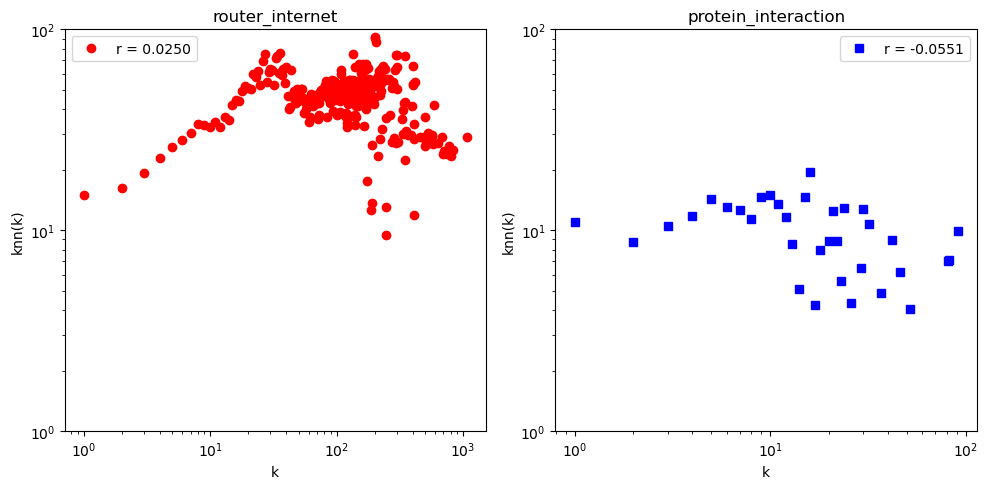

In [16]:
x1,y1=cal_knn(G1)
x3,y3=cal_knn(G3)
r1 = nx.degree_pearson_correlation_coefficient(G1)
r3 = nx.degree_pearson_correlation_coefficient(G3)
print('router_internet: ',r1)
print('protein_interaction: ',r3)
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(x1, y1,'ro',label='r = '+'%.4f'%r1)
plt.legend(loc=0)
plt.xlabel('k')
plt.ylabel('knn(k)')
plt.xscale('log')
plt.yscale('log')
plt.title('router_internet')
plt.ylim(1, 100)

plt.subplot(122)
plt.plot(x3, y3,'bs',label='r = '+'%.4f'%r3)
plt.legend(loc=0)
plt.xlabel('k')
plt.ylabel('knn(k)')
plt.xscale('log')
plt.yscale('log')
plt.title('protein_interaction')
plt.ylim(1, 100)
plt.tight_layout()

wiki-vote数据集，继续测试
Nodes: 7115 Edges: 103689

In [17]:
#读取wiki网络数据
df1=pd.read_table("./real-data/Wiki-Vote.txt",header=None)
df1.columns=['source','target']
G1=nx.from_pandas_edgelist(df1,'source','target',create_using=nx.DiGraph())
print(len(G1.nodes()))

7117


Wiki-Vote:  -0.08323373393028297


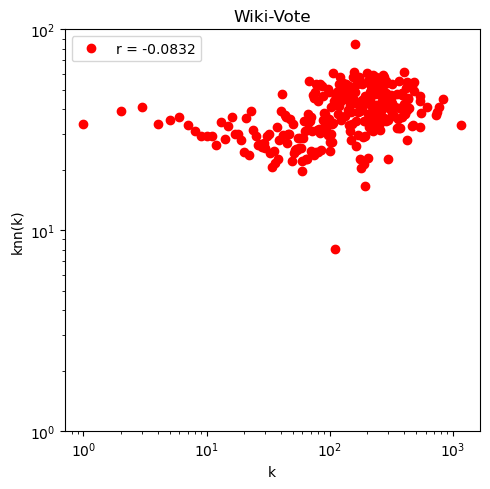

In [18]:
r1=nx.degree_pearson_correlation_coefficient(G1)
print('Wiki-Vote: ',r1)
x1,y1=cal_knn(G1)
plt.figure(figsize=(5,5))
plt.subplot(111)
plt.plot(x1, y1,'ro',label='r = '+'%.4f'%r1)
plt.legend(loc=0)
plt.xlabel('k')
plt.ylabel('knn(k)')
plt.xscale('log')
plt.yscale('log')
plt.title('Wiki-Vote')
plt.ylim(1, 100)
plt.tight_layout()

验证一个友谊悖论，计算整个网络的余平均度和平均度

平均度<k>为： 2.0
网络平均邻居度<kn>为： 2.416666666666667


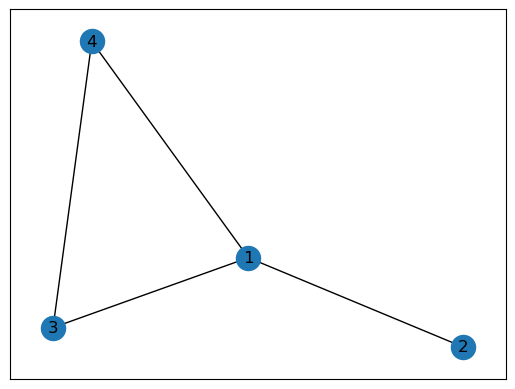

In [19]:
GF=nx.Graph()
GF.add_nodes_from([1,2,3,4])
GF.add_edges_from([(1,2),(1,4),(1,3),(3,4)])
nx.draw_networkx(GF)
average_degree=sum(GF.degree[i] for i in GF.nodes())/GF.number_of_nodes()
kn=sum(nx.average_neighbor_degree(GF).values())/GF.number_of_nodes()
print('平均度<k>为：',average_degree)
print('网络平均邻居度<kn>为：',kn)